In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm,datasets

In [141]:
iris=datasets.load_iris()
#取花瓣长度和花瓣宽度这两维数据
X=iris.data[:,2:]
y=iris.target

In [142]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [149]:
#使用原数据训练SVM获取其决策边界
svc=svm.SVC(kernel='linear',C=1).fit(X,y)


In [164]:
#将原数据区间内的全部数据用于预测以绘制等高线

x_min,x_max=X[:,0].min()-0.5,X[:,0].max()+1
y_min,y_max=X[:,1].min()-0.5,X[:,1].max()+1
#步长
h=(x_max-x_min)/100
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

In [165]:
np.c_[xx.ravel(),yy.ravel()]

array([[ 0.5  , -0.4  ],
       [ 0.574, -0.4  ],
       [ 0.648, -0.4  ],
       ...,
       [ 7.678,  3.448],
       [ 7.752,  3.448],
       [ 7.826,  3.448]])

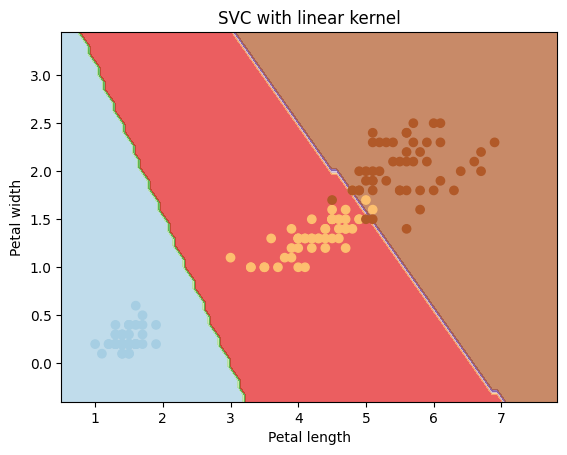

In [169]:
plt.subplot(1, 1, 1)
#预测数据所属类别，并将其作为等高线图的高度值
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#利用等高线图填充可视化SVM分类效果
plt.contourf(xx, yy, Z,cmap=plt.cm.Paired,alpha=0.7)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

#### 接下来使用SVM的核函数对非线性可分数据集进行分类

In [170]:
from sklearn.datasets import make_circles

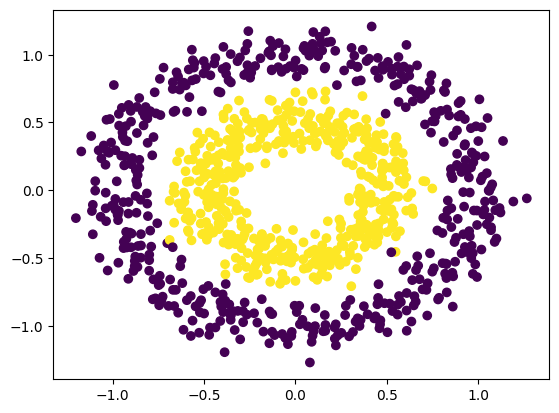

In [205]:
# datasets.make_circles()专门用来生成圆圈形状的二维样本.factor表示里圈和外圈的距离之比.每圈共有n_samples/2个点
# 里圈代表一个类，外圈也代表一个类.noise表示有0.1的点是异常点

x1,y1=make_circles(n_samples=1000,factor=0.5,noise=0.1)
plt.subplot(1,1,1)
plt.scatter(x1[:,0],x1[:,1],marker='o',c=y1)
plt.show()

In [201]:
#四阶多项式核即可分类该数据集,C为惩罚参数，值越大分错的点越少
svc=svm.SVC(kernel='poly',degree=4,C=10).fit(x1,y1)

In [202]:
#将原数据区间内的全部数据用于预测以绘制等高线
x1_min,x1_max=x1[:,0].min()-0.1,x1[:,0].max()+0.1
x2_min,x2_max=x1[:,1].min()-0.1,x1[:,1].max()+0.1
#步长
h=(x1_max-x1_min)/100
xx,yy=np.meshgrid(np.arange(x1_min,x1_max,h),np.arange(x2_min,x2_max,h))
np.c_[xx.ravel(),yy.ravel()]

array([[-1.37491442, -1.28706795],
       [-1.34803786, -1.28706795],
       [-1.3211613 , -1.28706795],
       ...,
       [ 1.23211199,  1.37371159],
       [ 1.25898856,  1.37371159],
       [ 1.28586512,  1.37371159]])

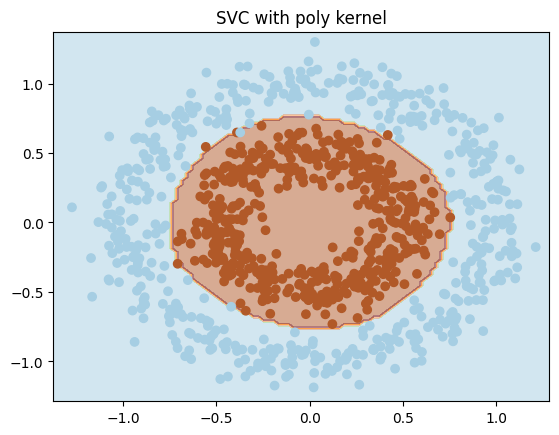

In [203]:
plt.subplot(1, 1, 1)
#预测数据所属类别，并将其作为等高线图的高度值
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#利用等高线图填充可视化SVM分类效果
plt.contourf(xx, yy, Z,cmap=plt.cm.Paired,alpha=0.5)
plt.scatter(x1[:, 0], x1[:, 1], c=y1, cmap=plt.cm.Paired)

plt.xlim(xx.min(), xx.max())
plt.title('SVC with poly kernel')
plt.show()

In [21]:
a=np.array([[1,2,3],[4,5,6]])
b=np.array([[7,8,9],[10,11,12]])

In [22]:
a

array([[1, 2, 3],
       [4, 5, 6]])

In [23]:
b

array([[ 7,  8,  9],
       [10, 11, 12]])

In [25]:
#横向拼接
np.c_[a,b]

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

In [26]:
#纵向拼接
np.r_[a,b]

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [54]:
m=np.arange(-5,5,1)
n=np.arange(-5,5,1)
print(m,n)

[-5 -4 -3 -2 -1  0  1  2  3  4] [-5 -4 -3 -2 -1  0  1  2  3  4]


In [55]:
M,N=np.meshgrid(m,n)

In [56]:
M

array([[-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4]])

In [57]:
N

array([[-5, -5, -5, -5, -5, -5, -5, -5, -5, -5],
       [-4, -4, -4, -4, -4, -4, -4, -4, -4, -4],
       [-3, -3, -3, -3, -3, -3, -3, -3, -3, -3],
       [-2, -2, -2, -2, -2, -2, -2, -2, -2, -2],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2],
       [ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3],
       [ 4,  4,  4,  4,  4,  4,  4,  4,  4,  4]])

In [114]:
z=np.ones_like(M)
z=np.float32(z)

In [115]:
for i,o in zip((4,5,6),(2,3,7)):
    for j,q in zip((4,5,6),(2,3,4)):
        z[i][j]=2
        z[o][q]=1.5

In [116]:
z

array([[1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ],
       [1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ],
       [1. , 1. , 1.5, 1.5, 1.5, 1. , 1. , 1. , 1. , 1. ],
       [1. , 1. , 1.5, 1.5, 1.5, 1. , 1. , 1. , 1. , 1. ],
       [1. , 1. , 1. , 1. , 2. , 2. , 2. , 1. , 1. , 1. ],
       [1. , 1. , 1. , 1. , 2. , 2. , 2. , 1. , 1. , 1. ],
       [1. , 1. , 1. , 1. , 2. , 2. , 2. , 1. , 1. , 1. ],
       [1. , 1. , 1.5, 1.5, 1.5, 1. , 1. , 1. , 1. , 1. ],
       [1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ],
       [1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ]], dtype=float32)

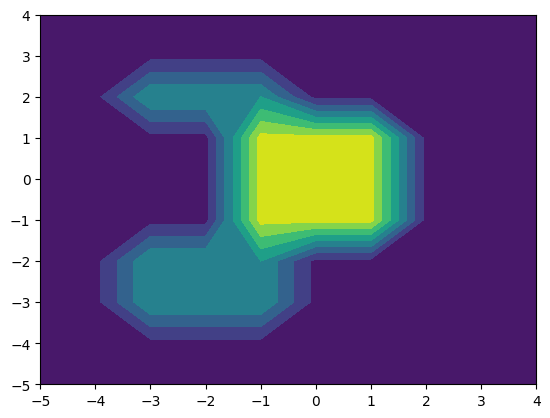

In [119]:
'''
关于plt.contourf(X,Y,z,[level],cmap,alpha)
    
    前两个参数分别是点对应的x，y坐标，第三个参数则是该坐标
对应的高度值即在坐标(x,y)处高度值为z。因此X,Y,z三个矩阵形式相同。
即一个位置的x对应一个位置的y对应一个位置的z。
参数[level]表示等高线的条数或者等高线的高度(为一个向量时)；
参数cmap表示填充等高线区域的色彩；
参数alpha表示填充区域的透明度。
'''
plt.contourf(M,N,z)
plt.show()